In [1]:
# K-Mean Clustering Implementation

 - Generate data from a "mixture model"

- Implement the K-means clustering algorithm and apply it to your data

- Some potential points to evaluate: How similar are the clusters to the "true" mixture? Does this depend on the amount of data? How does the model change with the number of mixture components (keeping the number fixed in the generating model)? How well can you visualize your data and algorithm?

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
import numpy as np
sns.set_context("talk", font_scale=1.5)

In [3]:
#Parameters = [nsample, cluster, cluster_std, random_tate, mix_comp]
def clustering(varbs):
    
    X, y = make_blobs(n_samples=varbs[0], centers=varbs[1], cluster_std=varbs[2], random_state=varbs[3])
    #(Make sample, cluster, std, mixuture nmber and random state)
    
    #Our data using the blob_function. 
    data = pd.DataFrame(X)
    data.columns=["X1","X2"]
    data["cluster"]=y
    data.head()
    
    # visualize and save our data
    title = "Simulated data"
    plt.figure(figsize=(7,7))
    sns.scatterplot(data=data, x="X1",y="X2", hue="cluster")
    plt.title(title)
    plt.legend()
#    plt.savefig("Data_for_fitting_Gaussian_Mixture_Models.png",format='png',dpi=150)
    
    #Making our model
    mix_comp = varbs[4]
    gmm = GaussianMixture(mix_comp, covariance_type='full', random_state = 0).fit(data[["X1","X2"]])
    print("The locations of the means of our mixture models are at: " +str(gmm.means_))
    
    #labeling the model observables. 
    labels = gmm.predict(data[["X1","X2"]])
    data[["predicted_cluster"]]=labels
    
    
    title = "Mixture model with "+ str(mix_comp) + " components"
    plt.figure(figsize=(7,7))
    sns.scatterplot(data=data, x="X1",y="X2", hue="predicted_cluster")
    sns.scatterplot(gmm.means_[:,0],gmm.means_[:,1],color='orange',marker='^')
    plt.title(title)
    plt.legend()
#   plt.savefig("Fitting_Gaussian_Mixture_Models_with_components.png",format='png',dpi=150)
    return(X)


The locations of the means of our mixture models are at: [[-5.79488876 -5.66652154]]


C:\Users\nf238\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


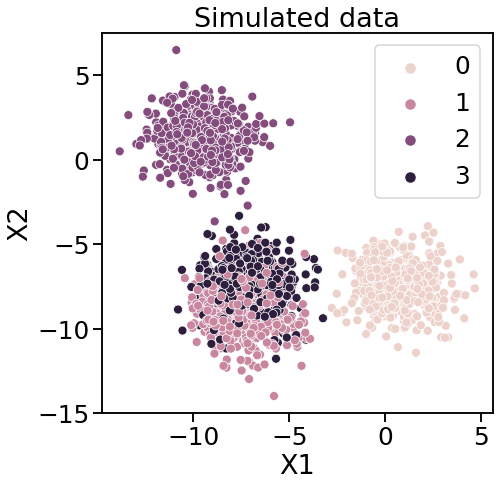

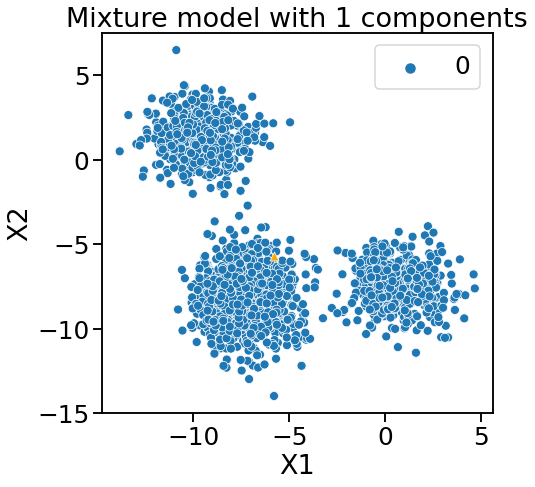

In [11]:
n_samples    = 2000
centers      = 4
cluster_std  = 1.3 
random_state = 28273
mix_comp     = 1

params = [n_samples, centers, cluster_std, random_state, mix_comp]
X = clustering(params)

The locations of the means of our mixture models are at: [[-4.52782077 -7.98128373]
 [-9.60673959  1.29721546]]


C:\Users\nf238\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


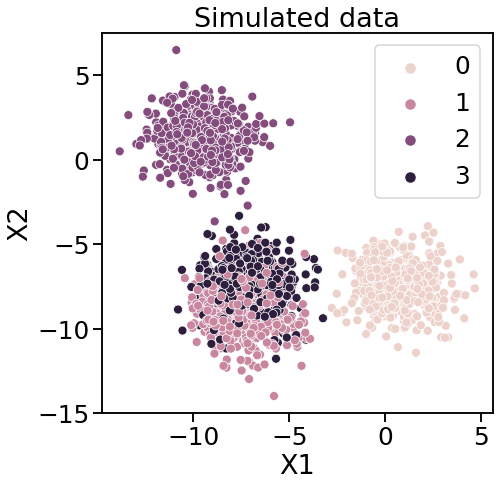

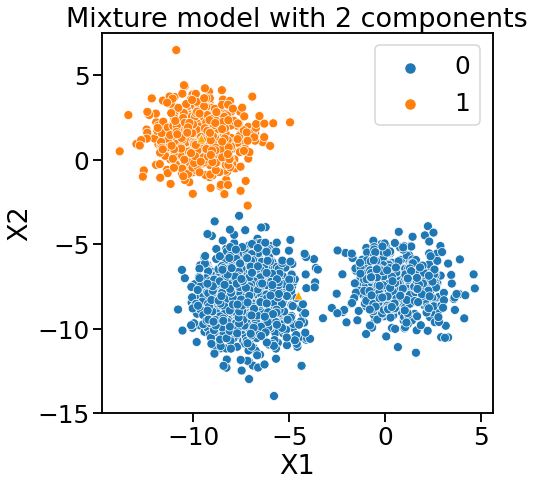

In [12]:
n_samples    = 2000
centers      = 4
cluster_std  = 1.3 
random_state = 28273
mix_comp     = 2

params = [n_samples, centers, cluster_std, random_state, mix_comp]
X = clustering(params)

The locations of the means of our mixture models are at: [[ 0.72545428 -7.52598314]
 [-7.15497864 -8.20522713]
 [-9.60968228  1.30309682]]


C:\Users\nf238\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


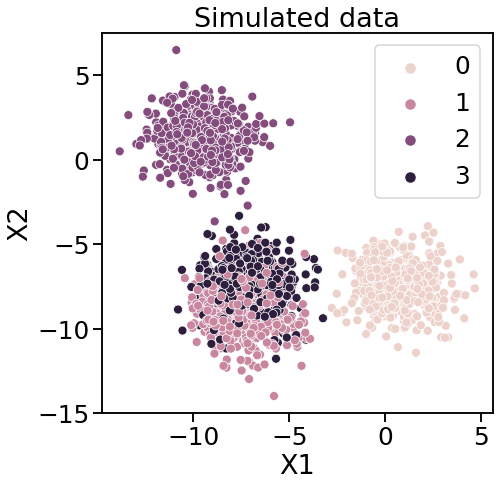

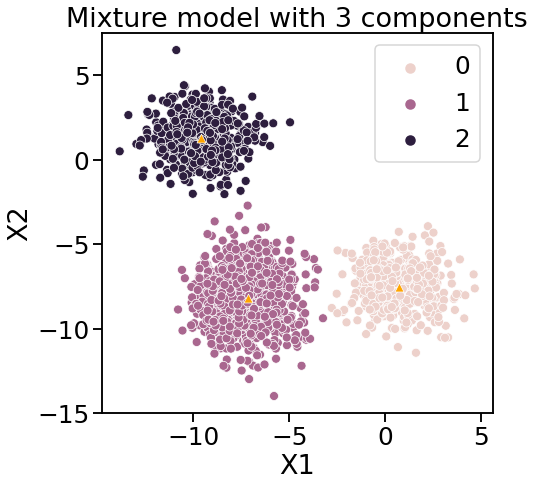

In [13]:
n_samples    = 2000
centers      = 4
cluster_std  = 1.3 
random_state = 28273
mix_comp     = 3

params = [n_samples, centers, cluster_std, random_state, mix_comp]
X = clustering(params)

The locations of the means of our mixture models are at: [[ 0.72403029 -7.52575482]
 [-6.9621299  -7.17812612]
 [-9.60717296  1.29856895]
 [-7.339163   -9.18637808]]


C:\Users\nf238\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


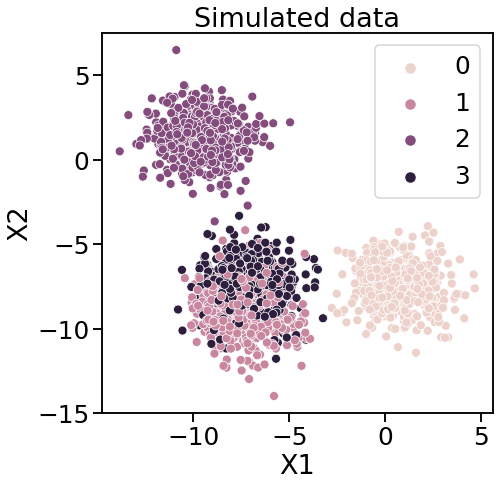

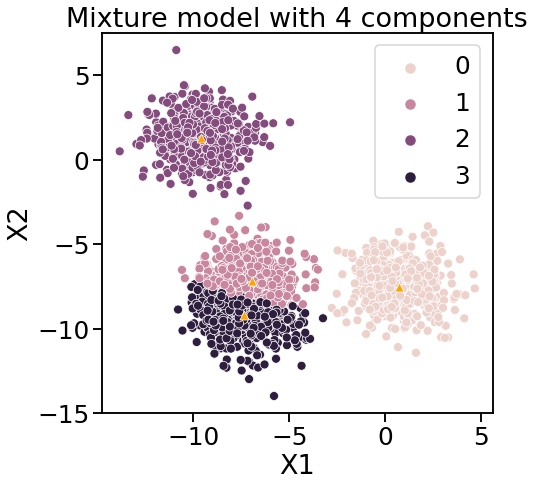

In [14]:
n_samples    = 2000
centers      = 4
cluster_std  = 1.3 
random_state = 28273
mix_comp     = 4

params = [n_samples, centers, cluster_std, random_state, mix_comp]
X = clustering(params)

(0.0, 10.0)

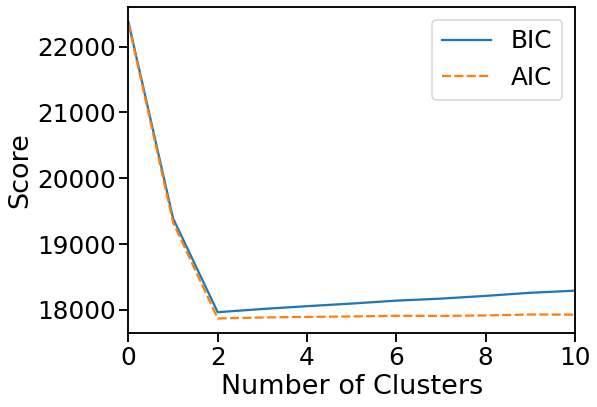

In [16]:
#Compare the models for different mixture components. 

n_components = np.arange(1, 21)
models = [GaussianMixture(n,covariance_type='full', random_state=0).fit(X) for n in n_components]

gmm_model_comparisons=pd.DataFrame({"n_components" : n_components,"BIC" : [m.bic(X) for m in models], "AIC" : [m.aic(X) for m in models]})

#Visualizing the above
plt.figure(figsize=(8,6))
sns.lineplot(data=gmm_model_comparisons[["BIC","AIC"]])
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.xlim(0,10)
#plt.savefig("Cluster Vs Models Performance .png",format='png',dpi=150)

As we increased the number of clusters, we basically approched a point of diminishing returns. We need more components than clusters - that's for sure!